### --> import required libararies:

In [60]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px 
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split,cross_val_score ,KFold
from sklearn.metrics import mean_absolute_error, r2_score,mean_absolute_error,accuracy_score,mean_squared_error
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
#ANN
from keras.models import Sequential 
from keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

### --> EDA

1 - read data 
2- EDA 
+ Drop col
3- missing 
4- duplicate 
5- outliers
6- corr 
7- encoding 
8- normlization / scalling 
9- feature selection & engineeing 
10 - train test 
11-traing 
12 -ecaluation 

In [61]:
df = pd.read_csv('car_purchasing.csv',encoding='ISO-8859-1')
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [63]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


##### --> check Missing data & Duplication

In [64]:
print('missing data : ',df.isna().sum().sum())
print('Duplicated data : ', df.duplicated().sum())  # Output: 0

missing data :  0
Duplicated data :  0


##### --> Drop unuseful Cols

In [65]:
df = df.drop(['customer name', 'customer e-mail'],axis=1)

##### --> check outliers 

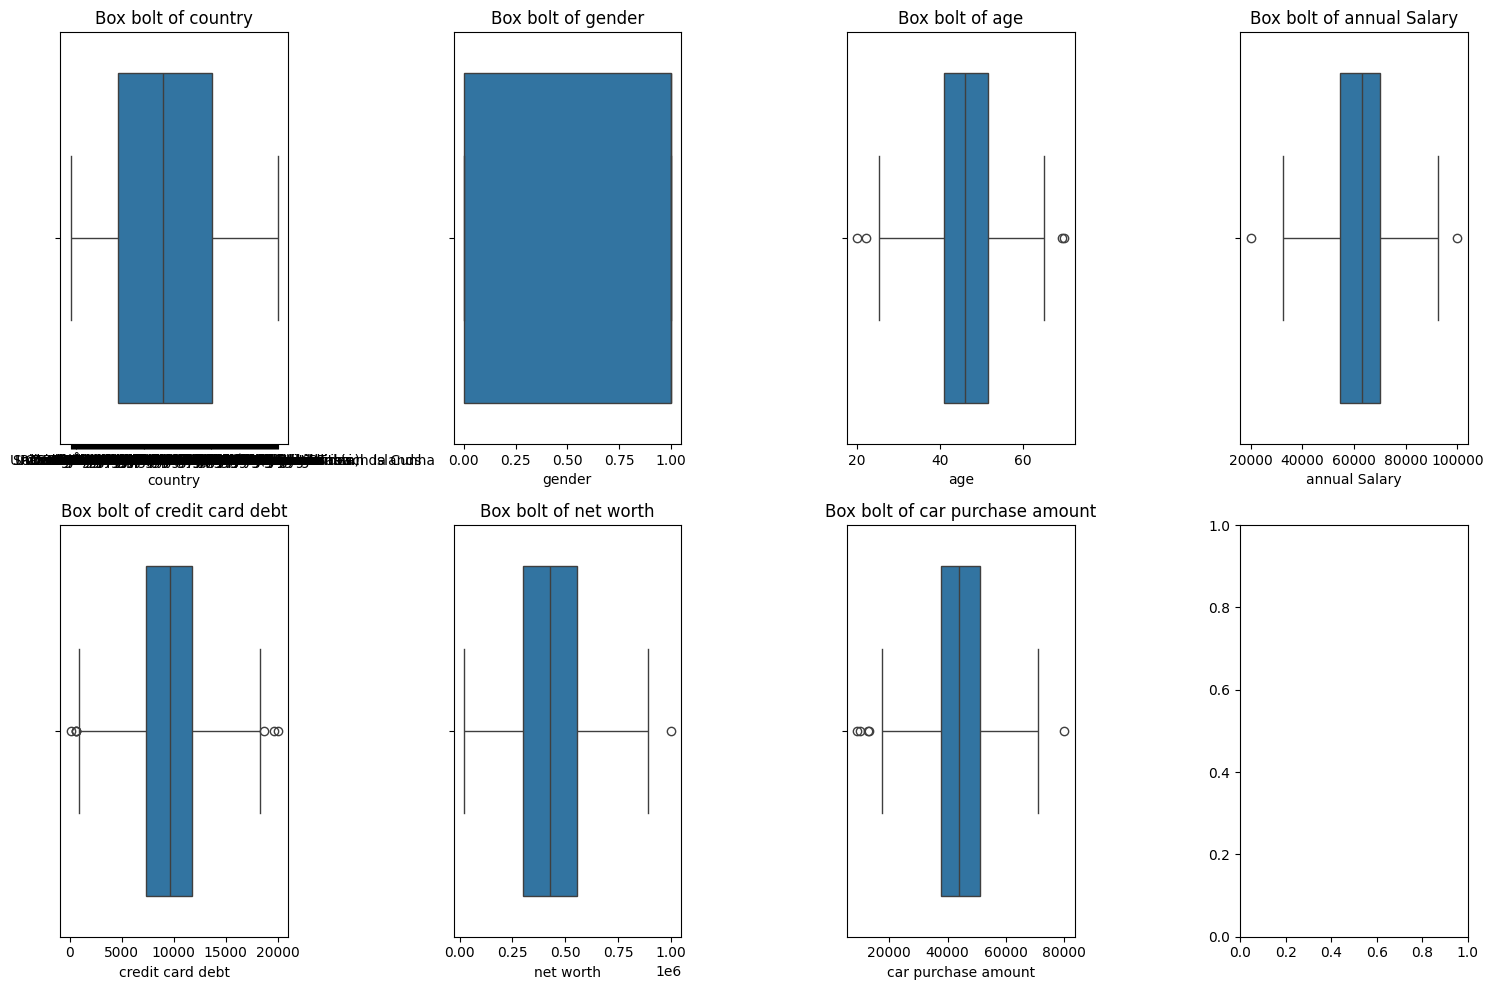

In [66]:
fig ,axes = plt.subplots(2,4,figsize=(15,10))   
axes = axes.flatten()
df_col = ['country', 'gender', 'age', 'annual Salary', 'credit card debt',
       'net worth', 'car purchase amount']
for i,col in enumerate(df_col):
    sns.boxplot(data = df, x = col, ax= axes[i])
    axes[i].set_title(f'Box bolt of {col}')
    
plt.tight_layout()
plt.show()

##### --> Correlation, HeatMap

In [67]:
col = df.columns.to_list().remove('country')
df.columns


Index(['country', 'gender', 'age', 'annual Salary', 'credit card debt',
       'net worth', 'car purchase amount'],
      dtype='object')

In [68]:
col = ['gender','age','annual Salary','credit card debt','net worth','car purchase amount']

In [69]:
ffig = go.Figure(data=go.Heatmap(
                    z= df.corr(numeric_only=True),
                    x= col ,  # Custom x-axis labels
                    y= col ,  # Custom y-axis labels
                    text = np.round(df.corr(numeric_only=True),2),
                    texttemplate="%{text}",
                    textfont={"size":20},
                    colorscale = 'Viridis'))

ffig.update_layout(title = 'Plotly Heatmap',
                  xaxis_title = 'X Axis',
                  yaxis_title = 'Y Axis',
                  width = 750,
                  height = 500)
ffig.show()

In [70]:
col

['gender',
 'age',
 'annual Salary',
 'credit card debt',
 'net worth',
 'car purchase amount']

In [71]:
# Compute the correlation matrix
corr_matrix = df.corr(numeric_only=True)
# Extract correlations with the target column
target_corr = corr_matrix[['car purchase amount']].sort_values(by='car purchase amount',ascending=False)

# Convert correlation matrix to arrays for Plotly
z_values = target_corr.values
y_labels = target_corr.index.to_list()

fig = go.Figure(data=go.Heatmap(
                    z= z_values,
                    # x= ['car purchase '] ,  # Custom x-axis labels
                    y= y_labels ,  # Custom y-axis labels
                    text = np.round(z_values,2),
                    texttemplate="%{text}",
                    textfont={"size":20},
                    colorscale = 'Viridis'))

fig.update_layout(title = 'Plotly Heatmap',
                  xaxis_title = 'car purchase amount',
                  yaxis_title = 'Y Axis',
                  width = 750,
                  height = 500)

fig.show()

## OBS:  are more  carpurchase 
Conclusion:
- Strong positive correlations: age, net worth, annual salary VS Car Purchase Amount (0.63,  0.49, 0.62)


### --> Data Encoding 

In [72]:
le = LabelEncoder()
df['Country_encoded'] = le.fit_transform(df['country'])
# Drop Country Cols
df = df.drop('country',axis=1) 


### --> Drop uncorrelated cols

In [73]:
df = df.drop(columns=['gender','Country_encoded'],index=1)
df.columns

Index(['age', 'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

### --> Data Normalization 

In [74]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()
# Apply Min_Max normalization to the entire dataframe
normalized_data = scaler.fit_transform(df)

# convert the normalized data back to a DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)

In [75]:
normalized_df.head()

,age,annual Salary,credit card debt,net worth,car purchase amount
0,0.437034,0.535151,0.578361,0.223430,0.370725
1,0.463058,0.422482,0.555797,0.631089,0.477827
2,0.765427,0.742125,0.719908,0.539387,0.822850
3,0.746275,0.496614,0.264257,0.551331,0.660781
4,0.736498,0.606248,0.707511,0.416822,0.670592


### --> Model Training

##### 1- trying Lienear Regression

In [76]:
# Define Feature and Target
X = normalized_df.drop('car purchase amount',axis=1)
Y = normalized_df['car purchase amount']

In [77]:
# split test train data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

# initialize Ridge --> to reduce over fitting 
le = Ridge(alpha=0)

# perform the K-fold cross Validation
cv_scores = cross_val_score(le, X_train,Y_train,cv=5,scoring='neg_mean_squared_error')
#convert negative MSE to positive for interpretation 
cv_scores = - cv_scores

#print the cross validatin score and the mean score
print("Cross-Validation MSE Score: ",cv_scores)
print('mean Cross-validatoin MSE: ',np.mean(cv_scores))


# train the model 
le.fit(X_train,Y_train)

# predict the model
Y_pred = le.predict(X_test)
Y_test = np.array(Y_test)



Cross-Validation MSE Score:  [4.60841851e-10 4.82995615e-10 5.14307621e-10 3.46698216e-10
 4.85846150e-10]
mean Cross-validatoin MSE:  4.5813789060252626e-10


### --> Model Evaluation

In [78]:
score = le.score(X_test,Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)


print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")
le.score(X_train,Y_train)


Mean Squared Error: 0.00
R-squared: 1.00


0.999999981091402

### --> Plot  

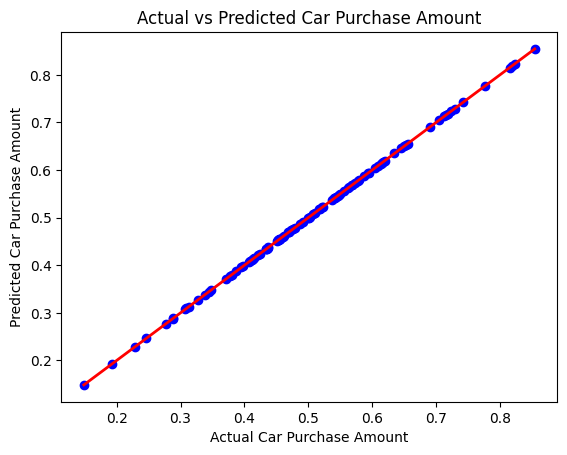

In [79]:
plt.scatter(Y_test, Y_pred, color='blue')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linewidth=2)  # Line for perfect prediction
plt.xlabel('Actual Car Purchase Amount')
plt.ylabel('Predicted Car Purchase Amount')
plt.title('Actual vs Predicted Car Purchase Amount')
plt.show()

OBS: Linear Regression model Overfit the data <br>
Note: can be reduced using L2 [ridge] , by uting alpha = 1 or 1.5

### --> ANN Model

In [80]:
# Build the ANN model (2 layers)
ann = Sequential([
    Dense(32,activation="relu"), # 1st hidden layer
    Dense(1, activation="linear")  # Output layer

])
# Compile the model
ann.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error',
    metrics=['mean_absolute_error']
)
# fit the model
history = ann.fit(X_train,Y_train,epochs= 50,validation_split=0.2)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.5290 - mean_absolute_error: 0.7017 - val_loss: 0.3961 - val_mean_absolute_error: 0.6082
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3335 - mean_absolute_error: 0.5543 - val_loss: 0.2448 - val_mean_absolute_error: 0.4724
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2049 - mean_absolute_error: 0.4263 - val_loss: 0.1389 - val_mean_absolute_error: 0.3481
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1108 - mean_absolute_error: 0.3037 - val_loss: 0.0716 - val_mean_absolute_error: 0.2406
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0559 - mean_absolute_error: 0.2073 - val_loss: 0.0331 - val_mean_absolute_error: 0.1525
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0265 - mean_absolute_error: 0.1351 - val_loss: 0.0155 - val_mean_absolute_error: 0.1011
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0155 - mean_absolute_error: 0.1002 - val_loss: 0.00

In [81]:
# Make predictions
ann_y_pred =ann.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [82]:
# Evaluate the model
r2 = r2_score(Y_test,Y_pred)
mse = mean_squared_error(Y_test,Y_pred)
print('R2 Score: ',r2)
print('\nMean squared error : ',mse)


R2 Score:  0.9999999814438357

Mean squared error :  3.7646352433513187e-10


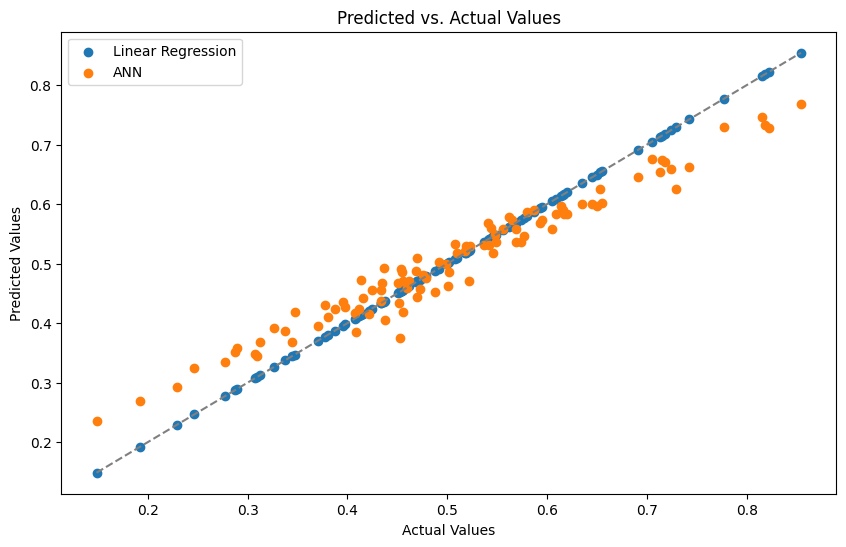

In [83]:
# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, label='Linear Regression')
plt.scatter(Y_test, ann_y_pred, label='ANN')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='gray')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.legend()
plt.show()

### **--> Conclusion** 
##### The **ANN** model outperformed the **linear regression** model in predicting the target values, especially in capturing non-linear patterns in the dataset. This suggests that ANN might be better suited for this particular problem.